# VR Acuity Orientation Data Analysis 

Notebook for creation of extraction of 2D unit vectors representing rotation along y-axis and further analysis to find rotation vs body movement(translation), including removal of 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import *

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%matplotlib notebook

path = 'VR_Acuity_Data/VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC/'
fname = 'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC.h5'
rat_orientation = pd.read_hdf(path+fname, '/preprocessed/Rigid Body/Rat/Orientation')

#dropping the y to go to 2D unitvector and then normalize

<IPython.core.display.Javascript object>


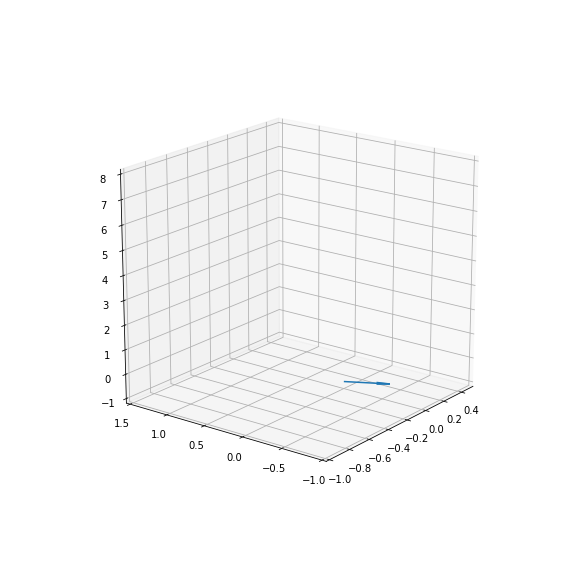

In [13]:
#Event location for data minimization
eventLog = pd.read_hdf(path+fname, '/events/eventlog')

start = eventLog.Time[4]
stop  = eventLog.Time[5]

for i,x in enumerate(rat_orientation.Time):
    if x == start:
        start_index = i

for i,x in enumerate(rat_orientation.Time):
    if x == stop:
        stop_index = i
        
X, Y, Z = rat_orientation.X,rat_orientation.Y, rat_orientation.Z
        
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

i=100

plt.quiver(0, 0, X[i],Y[i],Z[i], 0)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()

<IPython.core.display.Javascript object>


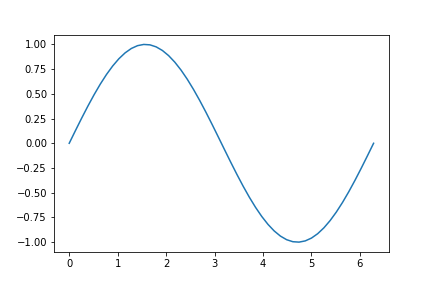

In [3]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);

In [ ]:
X, Y, Z = rat_orientation.X,rat_orientation.Y, rat_orientation.Z
        
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

plt.quiver(0, 0, X[0],Y[0],Z[0], 0)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()